The following script is made to design a Neural Network from scratch (without any libraries)

necessary imports...

In [280]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

*P1.1*

1.
2.
3.




1. Softmax-Regression loss and gradients calculation

    Parameters:
    - X: Input data matrix of shape (num_features, num_samples)
    - Y: True labels matrix of shape (num_classes, num_samples)
    - W: Weight matrix of shape (num_features, num_classes)
    - b: Bias vector of shape (num_classes,)

    Returns:
    - loss: Scalar value representing the loss
    - dw: Gradient of the loss with respect to W
    - db: Gradient of the loss with respect to b
    - dx: Gradient of the loss with respect to X


In [281]:
def softmax_regression_loss(X, Y, W, b):

    num_samples = X.shape[1]

    #calculate the value of the linear multiplication with normalization:
    linear_calc = np.dot(X.T, W) + b.reshape(1,-1)
    max_col = np.max(linear_calc, axis=1).reshape(-1,1)
    linear_norm = linear_calc - max_col
    #compute the softmax function:
    linear_norm_exp = np.exp(linear_norm)
    softmax = linear_norm_exp / np.sum(linear_norm_exp, axis=1).reshape(-1,1)

    #compute loss:
    log_softmax = np.log(softmax)
    #replace loss_unnorm with a vector with each entry being the inner multiplication of each column of Y with the corresponding column of log_softmax:
    loss_unnorm = Y*log_softmax.T
    loss = -np.sum(np.sum(loss_unnorm, axis=0)) / num_samples

    #compute gradients:
    dsoftmax = softmax - Y.T
    dw = np.dot(X, dsoftmax) / num_samples
    db = np.sum(dsoftmax) / num_samples
    

    #gradient w.t.r to X:
    dx = np.dot(W, softmax.T - Y) / num_samples


    return loss, dw, db, dx


2. Jacobian (or Gradient) Verification.
**let gpt implement**
    

In [282]:
def jacobian_verification(X,W,Y,b, epsilons, loss_function):
    
    num_features = X.shape[0]
    num_samples = X.shape[1]
    d = np.random.rand(num_features, num_samples)

    losses_ord1 = []
    losses_ord2 = []
        
    for epsilon in epsilons:
        eps_d = epsilon*d
        X_plus = X.copy() + eps_d

        #first order:
        loss_plus, _, _, _ = loss_function(X_plus, Y, W, b)
        loss, _,_, dx = loss_function(X, Y, W, b)
        loss_ord1 = loss_plus - loss
        loss_ord1_abs = np.abs(loss_ord1)
        #second order:
        loss_ord2 = loss_ord1 - np.sum(np.multiply(eps_d, dx))
        loss_ord2_abs = np.abs(loss_ord2)

        losses_ord1.append(loss_ord1_abs)
        losses_ord2.append(loss_ord2_abs)
    
    return losses_ord1, losses_ord2
     


In [283]:
def jacobian_verification_visualizer(losses_ord1, losses_ord2, epsilons):
    epsilons = np.sort(epsilons)
    plt.plot(epsilons, losses_ord1, label='First Order - O(\u03B5)')
    plt.plot(epsilons, losses_ord2, label='Second Order - O(\u03B5^2)')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Epsilon')
    plt.ylabel('Loss')
    plt.title('Gradient Verification - Log Scale')
    plt.legend()
    plt.show()

3. Randomise input and show correctness of p1 w.r.t p2

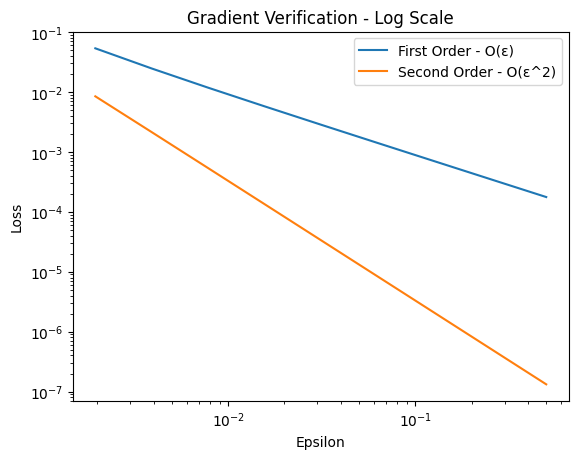

In [284]:
# Generate random X, Y, W, b, epsilons, d matching the dimensions in the above function signature:
num_features = 5
num_classes = 3
num_samples = 10
X = np.random.rand(num_features, num_samples)
W = np.random.rand(num_features, num_classes)
b = np.random.rand(num_classes,1)
#set Y to a random matrix with 1s in the correct class and 0s elsewhere:
Y = np.zeros((num_classes, num_samples))
for i in range(num_samples):
    Y[np.random.randint(0, num_classes), i] = 1
# create a decending array of epsilon values:
epsilons = np.array([(0.5)**i for i in range(1, 10)])
loss_function = softmax_regression_loss

losses_ord1, losses_ord2 = jacobian_verification(X , W, Y, b, epsilons, loss_function)
jacobian_verification_visualizer(losses_ord1, losses_ord2, epsilons)



*P1.2*:
1. SGD
2.
.
.
.


1. Implement SGD
- let gpt complete Input/Out desc

In [285]:
def sgd(X, Y, W, b, loss_function,  alpha = 0.1, num_iterations = 10000):

    losses = []
    for i in range(num_iterations):
        loss, dw, db, _ = loss_function(X, Y, W, b)
        losses.append(loss)
        W -= alpha*dw
        b -= alpha*db
    return W, b, losses

2. Create a 1D least-squares example to test SGD implementation:
- GPT...

In [286]:
def least_squares_loss(A, b, x, _):
    num_samples = A.shape[0]
    loss = np.sum(np.square(x*A - b)) / num_samples
    dx = 2 * np.dot(A.T, x*A - b) / num_samples
    return loss, dx, 0, 0

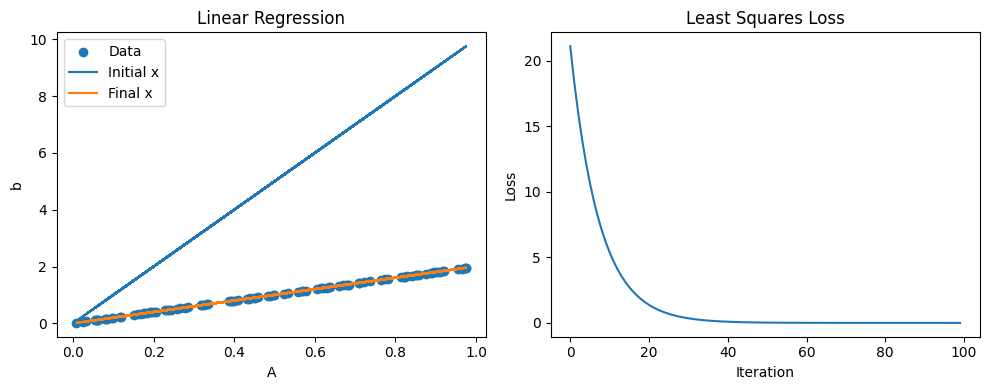

In [287]:
#create data A, b s.t the appropriate functions will make y=2x (for example):
A = np.random.rand(100, 1)
b = 2*A
#initialize x to a different factor than 2:
x = float(10)
#perform sgd and plot the initialised x and the final x:
alpha = 0.1
num_iterations = 100
loss_function = least_squares_loss
x_final, _, losses = sgd(A, b, x, 0, loss_function, alpha, num_iterations)
#add a fig for the loss and a fig for comparing the initial x to the final x on top of the data:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].scatter(A, b, label='Data')
axs[0].plot(A, x*A, label='Initial x')
axs[0].plot(A, x_final*A, label='Final x')
axs[0].set_xlabel('A')
axs[0].set_ylabel('b')
axs[0].set_title('Linear Regression')
axs[0].legend()

axs[1].plot(losses)
axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Loss')
axs[1].set_title('Least Squares Loss')

plt.tight_layout()
plt.show()


P1.3: do something else. Elaborate on trial and error leading to:
- add momentum to SGD improves performance
- local minimum doesnt cut it. need to run it over many iterations.
- around 50 outer iterations finds the same minimum as more than that
- increasing the batch sizes above around 10% of the data (~2000) has virtualy no effect. A batch of 1% (~200) does the job pretty good though much faster 
- around 500 inner iterations shows pretty much same results as more than that
 

In [288]:
def get_batch(X, Y, batch_size):
    num_samples = X.shape[1]
    batch_indices = np.random.choice(num_samples, batch_size, replace=False)
    X_batch = X[:, batch_indices]
    Y_batch = Y[:, batch_indices]
    return X_batch, Y_batch

In [289]:
def batch_sgd(X, Y, W, b, loss_function, alpha=0.1, num_iterations=10000, batch_size=100):
    losses = []
    for i in range(num_iterations):
        X_batch, Y_batch = get_batch(X, Y, batch_size)
        loss, dw, db, _ = loss_function(X_batch, Y_batch, W, b)
        losses.append(loss)
        W -= alpha*dw
        b -= alpha*db
    return W, b, losses

In [290]:
def batch_sgd_with_momentum(X, Y, W, b, loss_function, alpha=0.1, num_iterations=10000, batch_size=100, beta=0.9):
    losses = []
    v_w = 0
    v_b = 0
    for i in range(num_iterations):
        X_batch, Y_batch = get_batch(X, Y, batch_size)
        loss, dw, db, _ = loss_function(X_batch, Y_batch, W, b)
        losses.append(loss)
        v_w = beta*v_w + (1-beta)*dw
        v_b = beta*v_b + (1-beta)*db
        W -= alpha*v_w
        b -= alpha*v_b
    return W, b, losses

In [291]:
def batch_sgd_with_momentum_and_test_loss(Xt, Yt, Xv, Yv, W, b, loss_function, alpha=0.1, num_iterations=10000, batch_size=100, test_size=20, beta=0.9):
    losses = []
    test_losses = []
    v_w = 0
    v_b = 0
    for i in range(num_iterations):
        X_batch, Y_batch = get_batch(Xt, Yt, batch_size)
        loss, dw, db, _ = loss_function(X_batch, Y_batch, W, b)
        losses.append(loss)
        v_w = beta*v_w + (1-beta)*dw
        v_b = beta*v_b + (1-beta)*db
        W -= alpha*v_w
        b -= alpha*v_b
        X_test, Y_test = get_batch(Xv, Yv, test_size)
        test_loss, _, _, _ = loss_function(X_test, Y_test, W, b)
        test_losses.append(test_loss)
    return W, b, losses, test_losses

In [292]:
def batch_sgd_with_test_set_loss (Xt, Yt, Xv, Yv, W, b, loss_function, alpha=0.1, num_iterations=10000, batch_size=100, test_size=20):
    losses = []
    test_losses = []
    for i in range(num_iterations):
        X_batch, Y_batch = get_batch(Xt, Yt, batch_size)
        loss, dw, db, _ = loss_function(X_batch, Y_batch, W, b)
        losses.append(loss)
        W -= alpha*dw
        b -= alpha*db
        X_test, Y_test = get_batch(Xv, Yv, test_size)
        test_loss, _, _, _ = loss_function(X_test, Y_test, W, b)
        test_losses.append(test_loss)
    return W, b, losses, test_losses

In [293]:
def parse_data(filename):
    path = f"./HW1_Data/{filename}.mat"
    data = loadmat(path)
    Yt = data['Yt']
    Ct = data['Ct']
    Yv = data['Yv']
    Cv = data['Cv']
    return Yt, Ct, Yv, Cv

In [308]:
def rand_weights(num_features, num_classes):
    W = np.random.rand(num_features, num_classes)
    b = np.random.rand(num_classes, 1)
    return W, b

In [322]:
def sgd_find_global_minimum(Xt, Yt, Xv, Yv, loss_function, alpha=0.1, num_iterations=30, batch_size=100, test_size=20):
    num_features = Xt.shape[0]
    num_classes = Yt.shape[0]
    final_losses_matrix = []
    final_test_losses_matrix = []
    best_loss = np.inf
    W = None
    b = None
    for i in range(num_iterations):
        rand_W, rand_b = rand_weights(num_features, num_classes)
        rand_W, rand_b, losses, test_losses = batch_sgd_with_momentum_and_test_loss(Xt, Yt, Xv, Yv, rand_W, rand_b, loss_function, alpha, 1000, batch_size, test_size)
        if test_losses[-1] < best_loss:
            best_loss = test_losses[-1]
            W = rand_W
            b = rand_b
        final_losses_matrix.append(losses)
        final_test_losses_matrix.append(test_losses)

    final_losses_matrix = np.array(final_losses_matrix)
    final_test_losses_matrix = np.array(final_test_losses_matrix)
    final_losses = np.min(final_losses_matrix, axis=0)
    final_test_losses = np.min(final_test_losses_matrix, axis=0)
    return W,b,final_losses, final_test_losses



In [320]:
Yt, Ct, Yv, Cv = parse_data('GMMData')
Yt.shape, Ct.shape, Yv.shape, Cv.shape

((5, 25000), (5, 25000), (5, 6250), (5, 6250))

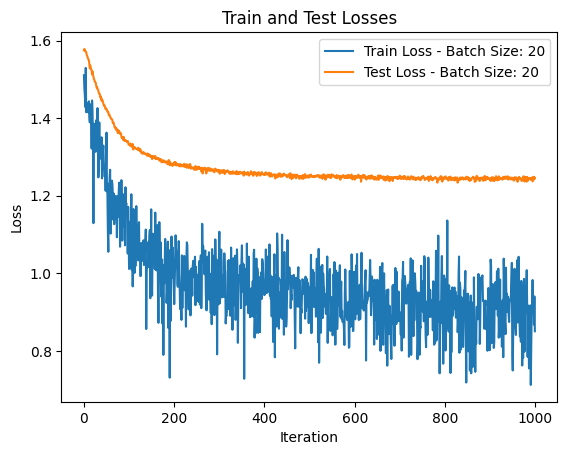

Final Train Loss - Batch Size: 20: 0.850413641412007
Final Test Loss - Batch Size: 20: 1.2447103701940012


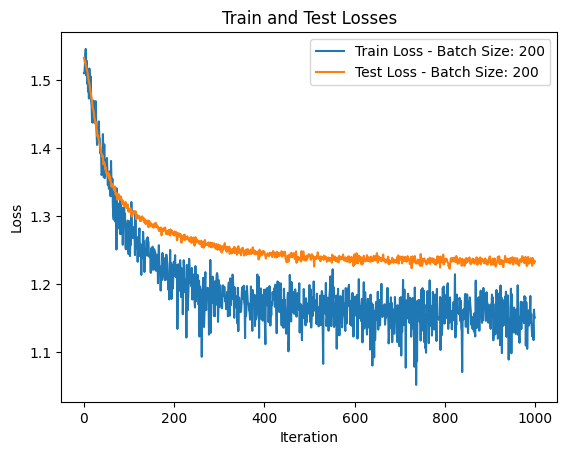

Final Train Loss - Batch Size: 200: 1.1510324970809898
Final Test Loss - Batch Size: 200: 1.233748219858433


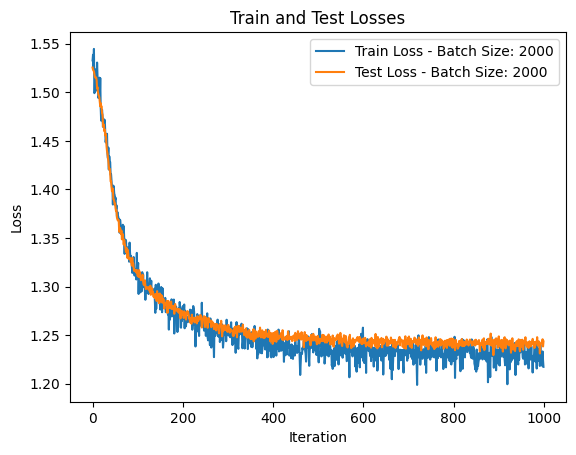

Final Train Loss - Batch Size: 2000: 1.2173079136110254
Final Test Loss - Batch Size: 2000: 1.2435132649392082


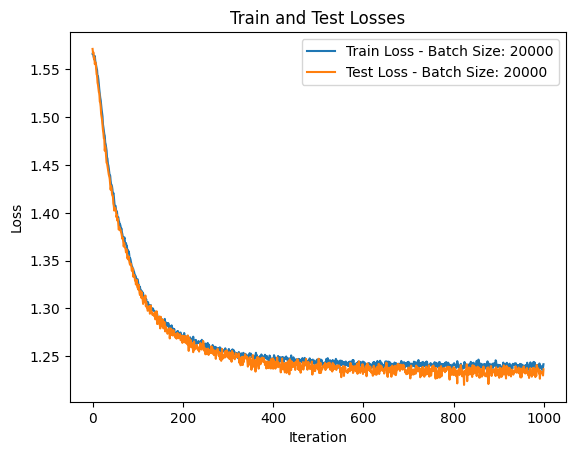

Final Train Loss - Batch Size: 20000: 1.2417503214974412
Final Test Loss - Batch Size: 20000: 1.2364394881198253


In [325]:

num_samples = Yt.shape[1]
num_features = Yt.shape[0]
num_classes = Ct.shape[0]
#initialize W and b:
W = np.random.rand(num_features, num_classes)
b = np.random.rand(num_classes, 1)
#perform batch sgd:
alpha = 0.1
num_iterations = 50
batch_size = [20, 200, 2000, 20000]
test_size = 5000
loss_function = softmax_regression_loss
for i in range(4):
    W_final, b_final, losses, test_losses = sgd_find_global_minimum(Yt, Ct, Yv, Cv, loss_function, alpha, num_iterations, batch_size[i], test_size)
    #plot the train and test losses:
    plt.plot(losses, label=f'Train Loss - Batch Size: {batch_size[i]}')
    plt.plot(test_losses, label=f'Test Loss - Batch Size: {batch_size[i]}')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Train and Test Losses')
    plt.legend()
    plt.show()
    print(f'Final Train Loss - Batch Size: {batch_size[i]}: {losses[-1]}')
    print(f'Final Test Loss - Batch Size: {batch_size[i]}: {test_losses[-1]}')




P3:
1. define tanh activation
2. define forward and back prop on a given network. recieve a vector of "layers" each containing W and b's and it's activation and use SGD to compute each one:
Li = (W,B,act_func)



3. 

In [333]:
class Activation:
    def __init__(self, activation_function, activation_derivative):
        self.activation_function = activation_function
        self.activation_derivative = activation_derivative

In [334]:
class Layer:
    def __init__(self, input_dim, output_dim, activation):
        self.W = np.random.rand(output_dim, input_dim)
        self.b = np.random.rand(output_dim, 1)
        self.activation = activation
        self.input = None
        self.output = None
        self.dW = None
        self.db = None
        self.dX = None

    def forward(self, X):
        self.input = X
        self.output = self.activation.calc(np.dot(self.W, X) + self.b)
        return self.output

    def backward(self, dY):
        linear_calc = np.dot(self.W, self.input) + self.b
        self.db = dY * self.activation.der(linear_calc)
        self.dW = np.dot(self.db, self.input.T)
        self.dX = np.dot(self.W.T, self.db)
        return self.dX

    def update(self, alpha):
        self.W -= alpha*self.dW
        self.b -= alpha*self.db

In [336]:
def softmax(X):
    max_col = np.max(X, axis=0).reshape(1,-1)
    X_norm = X - max_col
    X_exp = np.exp(X_norm)
    return X_exp / np.sum(X_exp, axis=0).reshape(1,-1)

class NeuralNetwork:
    def __init__(self, layers):
        self.layers = layers
        self.loss_function = layers[-1].activation
    def forward(self, X):
        for layer in self.layers:
            X = layer.forward(X)
        return X

    def backward(self, dY):
        for layer in reversed(self.layers):
            dY = layer.backward(dY)

    def update(self, alpha):
        for layer in self.layers:
            layer.update(alpha)

    def sgd(self, X, Y, alpha=0.1, num_iterations=10000):
        losses = []
        for i in range(num_iterations):
            Y_pred = self.forward(X)
            loss, dY = self.loss_function(Y, Y_pred)
            self.backward(dY)
            self.update(alpha)
            losses.append(loss)
        return losses

1. figure out what to do with the last layer (first one of backprop): how to compute loss, dY
2. re-define the Jacobian-test if necessary